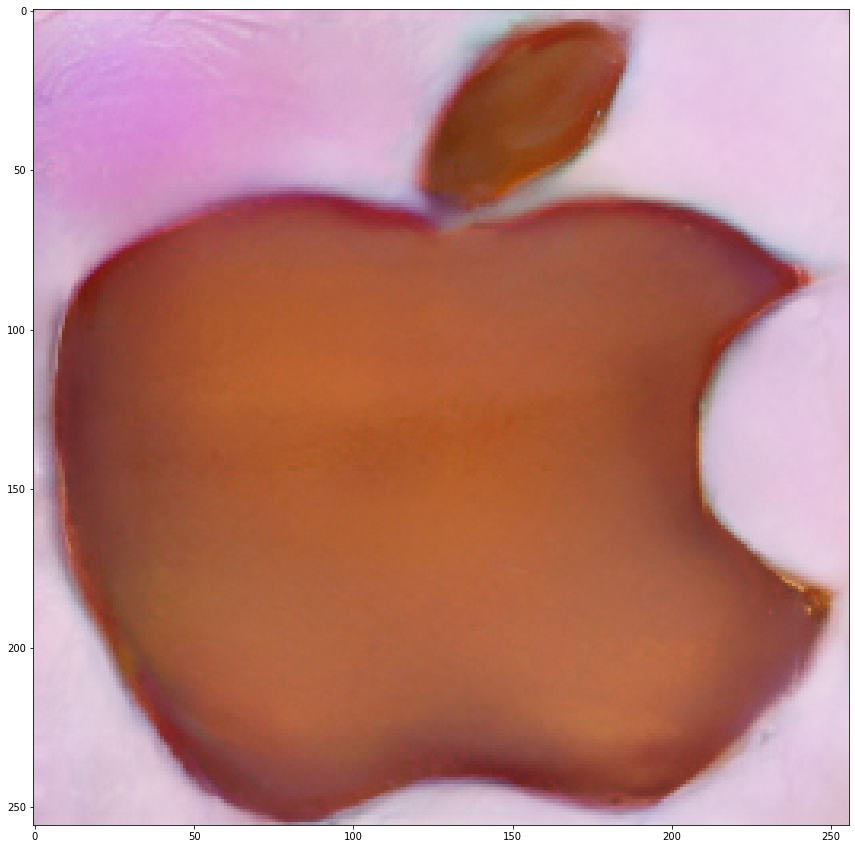

In [1]:
# 크로마 키 마스킹과 합성 (chromakey.py)

import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread(f'/data/ij/edge/LDC/apple_2.png')
img2 = cv2.imread("/data/ij/Mosaic_data_augmentation_YOLO/images_ori/1.jpg")

#--② ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

#--③ 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#--④ 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#--⑤ 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#--⑥ 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

#--⑦ 결과 출력
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(img1)
plt.show()

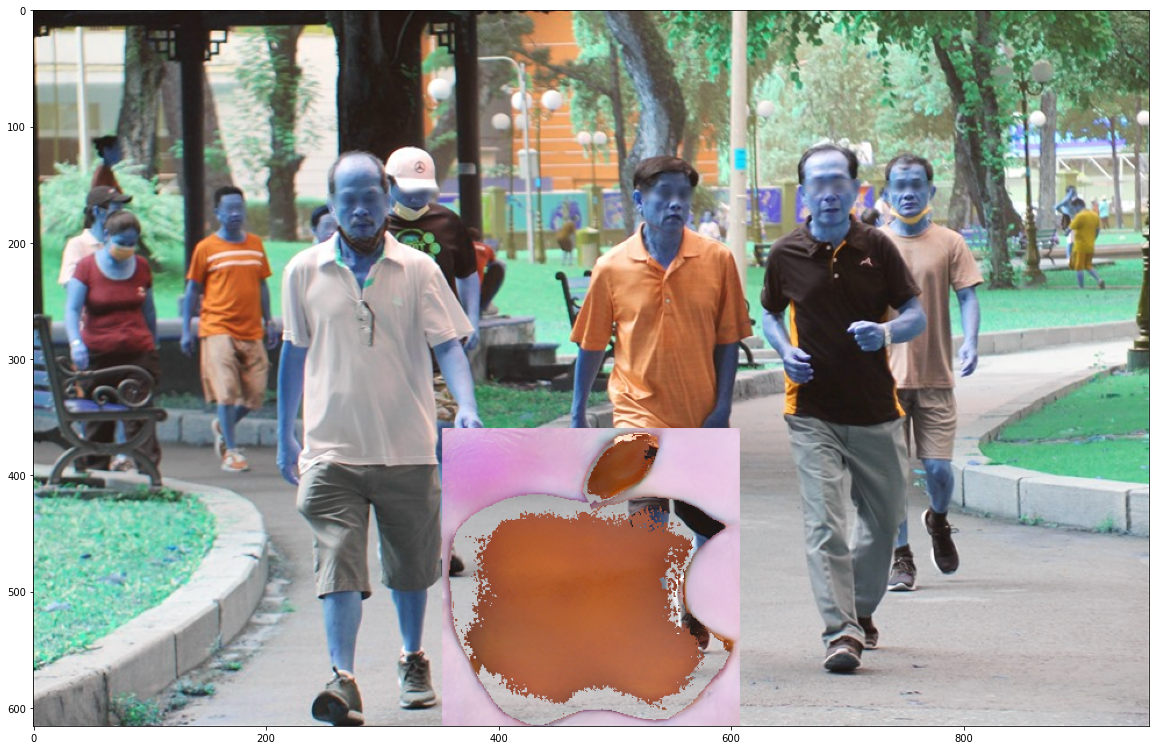

In [2]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(img2)
plt.show()